## Esercitazione 7 -  9 Aprile 2024

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$



In [98]:
from Newton_Minimo import *
import sympy as sym
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf

# Definizione delle variabili come lista
x = sym.symbols('x[0] x[1]')

# Definizione della funzione
#f_sym = sym.sin(x[0]**2/4 - x[1]**2/4) * sym.cos(2*x[0] - x[1])
#f_sym = (x[0]**2 - x[1]**2)**2 + (x[0] - 1)**2
f_sym = sym.sin(x[0]**2 / 2 - x[1]**2 / 4) * sym.cos(2*x[0] - sym.exp(x[1]))

# Conversione della funzione in una funzione numerica
f = lambdify((x[0], x[1]), f_sym, np)

# Calcolo del gradiente come lista di derivate
gradiente_sym = [sym.diff(f_sym, xi) for xi in x]
gradiente = np.array([lambdify((x[0], x[1]), g, np) for g in gradiente_sym])


# Calcolo della matrice Hessiana
Hess_sym = sym.hessian(f_sym, x)
Hess = np.array([[lambdify((x[0], x[1]), Hess_sym[i, j], np) for j in range(2)] for i in range(2)])

# Output delle derivate simboliche
print("Gradiente = \n")
sym.pretty_print(gradiente_sym)
print("Hessiana = \n")
sym.pretty_print(Hess_sym)

x0=np.array([-4.0,4.0])
tolx=1e-10
tolf=1.e-10
nmax=100
xN,contN,XmN= sf.newton_minimo_MOD(gradiente, Hess, x0, tolx, tolf, nmax)
print("Minimo in ",xN, "numero di iterazioni ",contN)


Gradiente = 

⎡                                                                             
⎢                                                                             
⎢                            ⎛    2       2⎞                            ⎛    2
⎢        ⎛          x[1]⎞    ⎜x[0]    x[1] ⎟        ⎛          x[1]⎞    ⎜x[0] 
⎢x[0]⋅cos⎝2⋅x[0] - ℯ    ⎠⋅cos⎜───── - ─────⎟ - 2⋅sin⎝2⋅x[0] - ℯ    ⎠⋅sin⎜─────
⎣                            ⎝  2       4  ⎠                            ⎝  2  

                                         ⎛    2       2⎞                      
                     ⎛          x[1]⎞    ⎜x[0]    x[1] ⎟                      
       2⎞    x[1]⋅cos⎝2⋅x[0] - ℯ    ⎠⋅cos⎜───── - ─────⎟                      
   x[1] ⎟                                ⎝  2       4  ⎠    x[1]    ⎛         
 - ─────⎟, - ─────────────────────────────────────────── + ℯ    ⋅sin⎝2⋅x[0] - 
     4  ⎠                         2                                           

                         ⎤
         

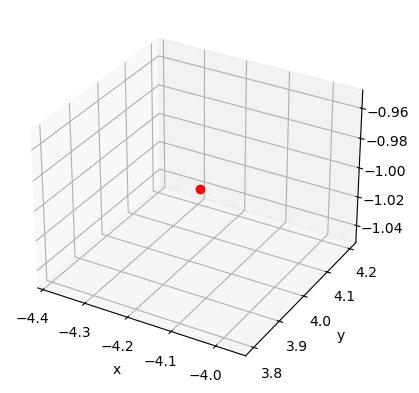

-4.17330795090663 3.9979297873602326 -1.0


In [99]:
xv = np.arange(-5, 5, 0.1)
yv = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xv, yv)
Z = f(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
ax.plot(xN[0], xN[1],f(xN[0], xN[1]),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()
print(xN[0], xN[1], f(xN[0], xN[1]))

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [100]:
import numpy as np
import math

mat = np.array([
    [1,2,3],
    [3,4,5],
    [4,2,8]
])

#Calcolo della norma 1
def norm_1(matrix):
    row_sums=np.sum(np.abs(matrix),axis=0)  #equivale a sommare gli elementi di tutte le righe 
    #(che equivale a fare la somma degli elementi di ogni colonna)
    max=np.max(row_sums)
    return max

#Calcolo della norma infinito
def norm_inf(matrix):
    col_sums=np.sum(np.abs(matrix),axis=1)  #equivale a sommare gli elementi di tutte le colonne
    #(che equivale a fare la somma degli elementi di ogni riga)
    max=np.max(col_sums)
    return max 

print("mynorma1=", norm_1(mat))
print("norma 1 con numpy.linalg.norm ", np.linalg.norm(mat,1))#Calcolo della norma 1
print("mynormainf=", norm_inf(mat))
print("norma inf con numpy.linalg.norm ", np.linalg.norm(mat,np.inf))

mynorma1= 16
norma 1 con numpy.linalg.norm  16.0
mynormainf= 14
norma inf con numpy.linalg.norm  14.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [101]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])

def norm_2(matrix):
    autovalori = np.linalg.eigvals(A.T@A)
    max_av = np.max(autovalori)
    return math.sqrt(max_av)

print("Mia norma 2 = ", norm_2(A))
print("Norma 2 = ", np.linalg.norm(A, 2))

Mia norma 2 =  9.056251013341882
Norma 2 =  9.05625101334188
